In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
target = 'median_house_value'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Median house value seems not to have a long tail, probably medium


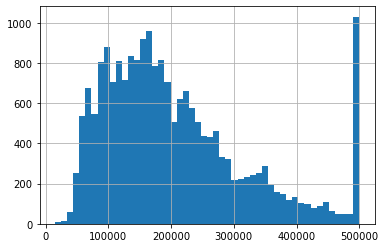

In [5]:
_ = df.median_house_value.hist(bins=50)
print('Median house value seems not to have a long tail, probably medium')

Logarithmic value of the target variable seems less skewed


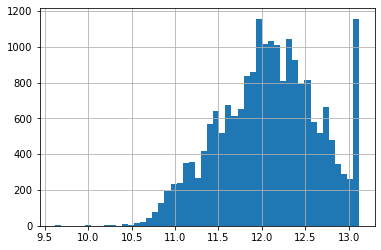

In [6]:
_ = np.log1p(df.median_house_value).hist(bins=50)
print('Logarithmic value of the target variable seems less skewed')

#### Select numerical values only

In [7]:
dfNum = df.select_dtypes('float64')
dfNum

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


####  Missing values

In [8]:
dfNum.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Median (50% percentile) for Population

In [9]:
print('Population median:', dfNum.population.median())
# Another way
print('Population median:', df.describe().population.loc['50%'])

Population median: 1166.0
Population median: 1166.0


In [10]:

class LinearRegression():
    
    def __init__(self, df, seed):
        self.df = df
        self.seed = seed
    
    # Split dataset in Train, Validation and Test  
    
    def splitData(self, pTrain=0.6, pVal=0.2, pTest=0.2):
        
        self.pTrain, self.pVal, self.pTest = pTrain, pVal, pTest
        np.random.seed(self.seed)
        
        assert self.pTrain + self.pVal + self.pTest == 1, 'Invalid split values, they should total = 1'
        
        newdf = self.df.copy()
        n = len(newdf)
        self.idx = np.arange(n)
        np.random.shuffle(self.idx)
        self.nTest = int(self.pTest * n)
        self.nVal = int(self.pVal * n)
        self.nTrain = n - self.nTest - self.nVal
        
        self.dfTrain = self.df.iloc[self.idx[:self.nTrain]]
        self.dfTrain.reset_index(drop=True, inplace=True)
        self.dfVal = self.df.iloc[self.idx[self.nTrain:self.nTrain+self.nVal]]
        self.dfVal.reset_index(drop=True, inplace=True)
        self.dfTest = self.df.iloc[self.idx[self.nTrain+self.nVal:]]
        self.dfTest.reset_index(drop=True, inplace=True)
    
        self.yTrain = np.log1p(self.dfTrain[target].values)
        self.yVal = np.log1p(self.dfVal[target].values)
        self.yTest = np.log1p(self.dfTest[target].values)
        
            del self.dfTrain[target]
            del self.dfVal[target]
            del self.dfTest[target]
            
    
    # 3. Fill NAs
    
    def prepareX(self, cols, how2fill = 'zero'):
        
        self.how2fill = how2fill
        dfTrain_Temp = self.dfTrain.copy()
        dfVal_Temp = self.dfVal.copy()
        dfTest_Temp = self.dfTest.copy()
        
        values = {col:self.dfTrain[col].mean() if how2fill == 'mean' else 0 for col in cols}
        
        dfTrain_Temp.fillna(values, inplace=True)
        self.XTrain = dfTrain_Temp.values
        
        dfVal_Temp.fillna(values, inplace=True)
        self.XVal = dfVal_Temp.values
        
        dfTest_Temp.fillna(values, inplace=True)
        self.XTest = dfTest_Temp.values
        
    
    # New model function including regularization
    
    def train(self, r=1e-3, full=False):
        self.r = r
           
        ones = np.ones(self.XTrain.shape[0])
        _XTrainNew = np.column_stack([ones, self.XTrain])
        _XTX = _XTrainNew.T.dot(_XTrainNew)
        
        # Regularization
        _XTX = _XTX + self.r * np.eye(_XTX.shape[0])
        
        _XTXInv = np.linalg.inv(_XTX)
        self._w = _XTXInv.dot(_XTrainNew.T).dot(self.yTrain)
        self.w0 = self._w[0]
        self.w = self._w[1:]        
        
        self.yPred = self.w0 + self.XTrain.dot(self.w)
        
        self.yValPred = self.w0 + self.XVal.dot(self.w)
        
        self.yTestPred = self.w0 + self.XTest.dot(self.w)
        #print(self.yPred)
    
    
    # Function to calculate the rmse error   
    
    def rmse(self):

        trainErr = (self.yTrain - self.yPred)**2
        self.trainMSE = round(np.sqrt(trainErr.mean()),2)
        if self.pVal != 0:
            valErr = (self.yVal - self.yValPred)**2
            self.valMSE = round(np.sqrt(valErr.mean()),2)
        else:
            self.valMSE = np.nan
        if self.pTest != 0:
            testErr = (self.yTest - self.yTestPred)**2
            self.testMSE = round(np.sqrt(testErr.mean()),2)
        else:
            self.testMSE = np.nan

In [11]:
# Initializing some variables
file = 'housing.csv'
seed = 42

In [12]:
#Creating model
model = LinearRegression(dfNum, seed)

In [13]:
# Spliting data
model.splitData()

#### Errors for both models with fillna = Zero and Mean are equally good for Validation and Train datasets

In [14]:
model.prepareX(cols = ['total_bedrooms'], how2fill = 'zero')
model.train(r=0)
print(f'Error with fillna = {model.how2fill}')
model.rmse()
print(f'- Train error: {model.trainMSE}  - Validation error: {model.valMSE}  - Test error: {model.testMSE}')        

Error with fillna = zero
- Train error: 0.34  - Validation error: 0.33  - Test error: 0.35


In [15]:
model.prepareX(cols = ['total_bedrooms'], how2fill = 'mean')
model.train(r=0)
print(f'Error with fillna = {model.how2fill}' )
model.rmse()
print(f'- Train error: {model.trainMSE} - Validation error: {model.valMSE}  - Test error: {model.testMSE}')        

Error with fillna = mean
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35


#### Best RMSE for r in  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [16]:
model.prepareX(cols = ['total_bedrooms'], how2fill = 'zero')
Rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in Rs:
    model.train(r)
    print(f'Error with fillna = {model.how2fill} and r = {r}')
    model.rmse()
    print(f'- Train error: {model.trainMSE} - Validation error: {model.valMSE}  - Test error: {model.testMSE}')        
    print()

Error with fillna = zero and r = 0
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35

Error with fillna = zero and r = 1e-06
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35

Error with fillna = zero and r = 0.0001
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35

Error with fillna = zero and r = 0.001
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35

Error with fillna = zero and r = 0.01
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35

Error with fillna = zero and r = 0.1
- Train error: 0.34 - Validation error: 0.33  - Test error: 0.35

Error with fillna = zero and r = 1
- Train error: 0.35 - Validation error: 0.33  - Test error: 0.36

Error with fillna = zero and r = 5
- Train error: 0.35 - Validation error: 0.34  - Test error: 0.36

Error with fillna = zero and r = 10
- Train error: 0.35 - Validation error: 0.34  - Test error: 0.36



#### Testing model on different seeds

In [17]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
errors = []

for seed in seeds:
    #Creating model
    model = LinearRegression(dfNum, seed)
    # Spliting data
    model.splitData(pTrain=0.6, pVal=.2, pTest=0.2)
    
    model.prepareX(cols = ['total_bedrooms'], how2fill = 'zero')
    model.train(r=0)
    model.rmse()
    errors.append(model.valMSE)
    print(f'Seed={seed} - Train error: {model.trainMSE} - Validation error: {model.valMSE} - Test error: {model.testMSE}')        

errstd = round(np.std(errors),3)    
print()
print(f'Standard deviation of the errors (for different seeds): {errstd}')

Seed=0 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.34
Seed=1 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.34
Seed=2 - Train error: 0.34 - Validation error: 0.33 - Test error: 0.35
Seed=3 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.34
Seed=4 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.34
Seed=5 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.34
Seed=6 - Train error: 0.34 - Validation error: 0.35 - Test error: 0.34
Seed=7 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.35
Seed=8 - Train error: 0.34 - Validation error: 0.35 - Test error: 0.35
Seed=9 - Train error: 0.34 - Validation error: 0.34 - Test error: 0.35

Standard deviation of the errors (for different seeds): 0.005


#### RMSE on test with trainin on Train + Validation

In [18]:
seed = 9
#Creating model
model = LinearRegression(dfNum, seed)
# Spliting data
model.splitData(pTrain=0.8, pVal=0, pTest=0.2)
model.prepareX(cols = ['total_bedrooms'], how2fill = 'zero')
model.train(r=0.001)
model.rmse()
errors.append(model.valMSE)
print(f'Training on full dataset <Train + Validation>:')
print(f'Seed={seed} - Train error: {model.trainMSE} - Validation error: {model.valMSE} - Test error: {model.testMSE}')        


Training on full dataset <Train + Validation>:
Seed=9 - Train error: 0.34 - Validation error: nan - Test error: 0.35
